In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score
sports = pd.read_csv("plz2.csv")
print(sports.shape)
sports

(7450, 38)


,Q03_nb,sign,newid,AGE,Q01,Q03,Q051,Q131,Q131_1,Q131_2,...,Q08_2,Q08_3,Q08_4,Q08_5,Q08_6,Q08_7,Q11,Q12,JOB1,WT
0,0,0,2892,47,4,3,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1959.611111
1,0,0,4378,67,3,2,4,1,1,0,...,0,0,0,0,0,0,0,0,1,3883.823529
2,0,0,105,62,2,2,4,3,0,0,...,0,1,0,0,0,0,0,0,0,9410.586207
3,0,0,3342,50,2,2,2,2,0,1,...,0,0,0,0,0,1,0,0,1,11299.070710
4,0,0,1628,72,3,3,3,5,0,0,...,0,0,0,0,0,0,0,1,0,4397.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,1,1,7587,35,4,4,2,1,1,0,...,0,1,0,0,0,0,0,0,1,1771.705882
7446,1,1,2686,63,4,4,4,5,0,0,...,0,0,0,0,0,0,0,0,1,4164.371429
7447,1,1,6768,37,4,4,4,5,0,0,...,0,0,0,0,0,0,0,0,1,3220.148148
7448,1,1,1296,19,5,5,4,1,1,0,...,0,0,1,0,0,0,0,0,0,3563.937500


In [6]:
features=sports[['Q03_nb','AGE','Q131_1','Q131_2','Q131_3','Q131_4','Q131_5','add0','add1','add2','else','Q08_1','Q08_2','Q08_3','Q08_4','Q08_5','Q08_6']]
know=sports['Q32_b']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, know,random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
rf=RandomForestClassifier(n_jobs=-1)

In [5]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
features=X_train.columns.values

In [8]:
rf.score(X_test,y_test)

0.8223295759527643

In [12]:
import plotly.graph_objs as go
import plotly.offline as py
x,y=(list(x) for x in zip(*sorted(zip(rf.feature_importances_,features),reverse=False)))
trace2=go.Bar(x=x,
             y=y,
             marker=dict(
             color=x,
             colorscale='Viridis',
             reversescale=True
             ),
             name='Random Forest Feature Importance',
             orientation='h',
             )
layout=dict(
    title='Barplot of Feature Importance',
    width=500,height=1000,
    yaxis=dict(
    showgrid=False,
    showline=False,
    showticklabels=True,
    domain=[0,0.85],
    ))
fig1=go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1,filename='plots')
    


# 랜덤포레스트-gridsearch

In [8]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8170


In [9]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8575


In [10]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 10, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.8626


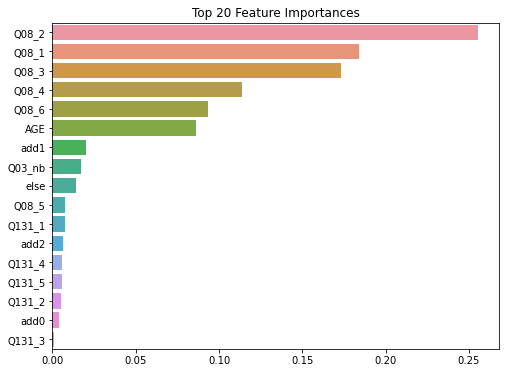

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# XGB - GridSearchCV

In [18]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [19]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [20]:
# 예측 결과 확인
get_clf_eval(y_test, w_preds)

오차행렬:
 [[ 517  184]
 [  68 1094]]

정확도: 0.8647
정밀도: 0.8560
재현율: 0.9415
F1: 0.8967
AUC: 0.8395


In [21]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="logloss", eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.66273
[1]	validation_0-logloss:0.63787
[2]	validation_0-logloss:0.61740
[3]	validation_0-logloss:0.60049
[4]	validation_0-logloss:0.58489
[5]	validation_0-logloss:0.57283
[6]	validation_0-logloss:0.56013
[7]	validation_0-logloss:0.55011
[8]	validation_0-logloss:0.53932


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.53058
[10]	validation_0-logloss:0.52083
[11]	validation_0-logloss:0.51352
[12]	validation_0-logloss:0.50558
[13]	validation_0-logloss:0.49881
[14]	validation_0-logloss:0.49181
[15]	validation_0-logloss:0.48560
[16]	validation_0-logloss:0.47956
[17]	validation_0-logloss:0.47456
[18]	validation_0-logloss:0.46864
[19]	validation_0-logloss:0.46444
[20]	validation_0-logloss:0.45994
[21]	validation_0-logloss:0.45563
[22]	validation_0-logloss:0.45183
[23]	validation_0-logloss:0.44741
[24]	validation_0-logloss:0.44451
[25]	validation_0-logloss:0.44071
[26]	validation_0-logloss:0.43831
[27]	validation_0-logloss:0.43485
[28]	validation_0-logloss:0.43196
[29]	validation_0-logloss:0.42968
[30]	validation_0-logloss:0.42718
[31]	validation_0-logloss:0.42463
[32]	validation_0-logloss:0.42232
[33]	validation_0-logloss:0.42070
[34]	validation_0-logloss:0.41799
[35]	validation_0-logloss:0.41578
[36]	validation_0-logloss:0.41438
[37]	validation_0-logloss:0.41267
[38]	validation

[245]	validation_0-logloss:0.37334
[246]	validation_0-logloss:0.37335
[247]	validation_0-logloss:0.37343
[248]	validation_0-logloss:0.37346
[249]	validation_0-logloss:0.37344
[250]	validation_0-logloss:0.37339
[251]	validation_0-logloss:0.37307
[252]	validation_0-logloss:0.37324
[253]	validation_0-logloss:0.37307
[254]	validation_0-logloss:0.37313
[255]	validation_0-logloss:0.37319
[256]	validation_0-logloss:0.37324
[257]	validation_0-logloss:0.37326
[258]	validation_0-logloss:0.37330
[259]	validation_0-logloss:0.37340
[260]	validation_0-logloss:0.37340
[261]	validation_0-logloss:0.37346
[262]	validation_0-logloss:0.37348
[263]	validation_0-logloss:0.37350
[264]	validation_0-logloss:0.37352
[265]	validation_0-logloss:0.37352
[266]	validation_0-logloss:0.37370
[267]	validation_0-logloss:0.37370
[268]	validation_0-logloss:0.37371
[269]	validation_0-logloss:0.37366
[270]	validation_0-logloss:0.37366
[271]	validation_0-logloss:0.37374
[272]	validation_0-logloss:0.37375
[273]	validation_0-l

In [22]:
get_clf_eval(y_test, ws100_preds)

오차행렬:
 [[ 516  185]
 [  65 1097]]

정확도: 0.8658
정밀도: 0.8557
재현율: 0.9441
F1: 0.8977
AUC: 0.8401


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

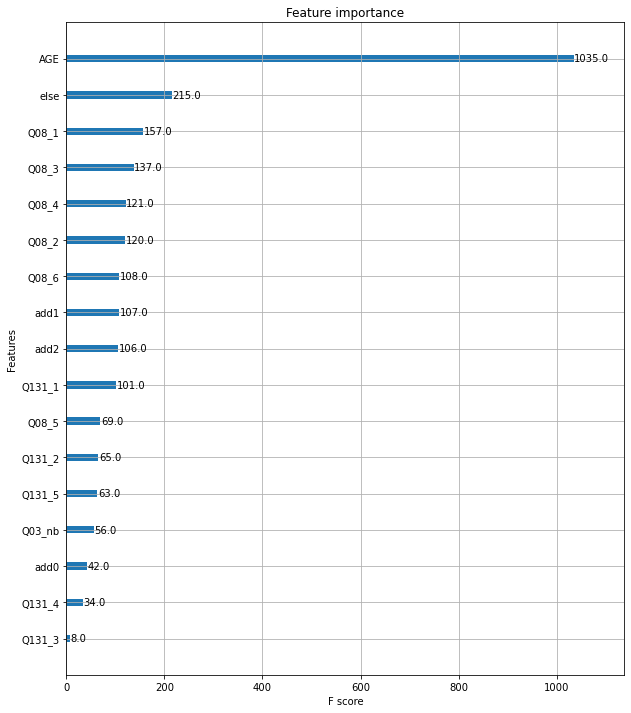

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb = XGBClassifier()

In [26]:
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    

In [27]:
gscv_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=2)

In [28]:
gscv_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   1.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   1.1s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=200; total time=   1.0s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   1.5s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   1.6s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=300; total time=   1.5s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   2.5s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   2.7s
[CV] END .max_depth=10, min_child_weight=1, n_estimators=500; total time=   2.7s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   5.4s
[CV] END max_depth=10, min_child_weight=1, n_estimators=1000; total time=   5.4s
[CV] END max_depth=10, min_child_weight=1, n_es

[CV] END .max_depth=50, min_child_weight=1, n_estimators=300; total time=   3.4s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   5.2s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   4.8s
[CV] END .max_depth=50, min_child_weight=1, n_estimators=500; total time=   4.6s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   9.2s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   9.3s
[CV] END max_depth=50, min_child_weight=1, n_estimators=1000; total time=   9.0s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   1.5s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   1.6s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=200; total time=   1.5s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=300; total time=   2.6s
[CV] END .max_depth=50, min_child_weight=3, n_estimators=300; total time=   2.4s
[CV] END .max_depth=50, min_

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [29]:
print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))

XGB 파라미터:  {'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 200}
XGB 예측 정확도: 0.8396


In [30]:
xgb_wrapper = XGBClassifier(n_estimators = 200, learning_rate = 0.1 , max_depth = 10,min_child_weight= 10)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="logloss", eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.64249
[1]	validation_0-logloss:0.60102
[2]	validation_0-logloss:0.56688
[3]	validation_0-logloss:0.53829


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.51429
[5]	validation_0-logloss:0.49369
[6]	validation_0-logloss:0.47636
[7]	validation_0-logloss:0.46117
[8]	validation_0-logloss:0.44855
[9]	validation_0-logloss:0.43753
[10]	validation_0-logloss:0.42844
[11]	validation_0-logloss:0.42056
[12]	validation_0-logloss:0.41409
[13]	validation_0-logloss:0.40856
[14]	validation_0-logloss:0.40377
[15]	validation_0-logloss:0.39996
[16]	validation_0-logloss:0.39620
[17]	validation_0-logloss:0.39334
[18]	validation_0-logloss:0.39063
[19]	validation_0-logloss:0.38885
[20]	validation_0-logloss:0.38713
[21]	validation_0-logloss:0.38582
[22]	validation_0-logloss:0.38444
[23]	validation_0-logloss:0.38362
[24]	validation_0-logloss:0.38277
[25]	validation_0-logloss:0.38219
[26]	validation_0-logloss:0.38164
[27]	validation_0-logloss:0.38131
[28]	validation_0-logloss:0.38107
[29]	validation_0-logloss:0.38063
[30]	validation_0-logloss:0.38043
[31]	validation_0-logloss:0.38041
[32]	validation_0-logloss:0.38017
[33]	validation_0-lo

In [31]:
get_clf_eval(y_test, ws100_preds)

오차행렬:
 [[ 516  185]
 [  74 1088]]

정확도: 0.8610
정밀도: 0.8547
재현율: 0.9363
F1: 0.8936
AUC: 0.8362


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

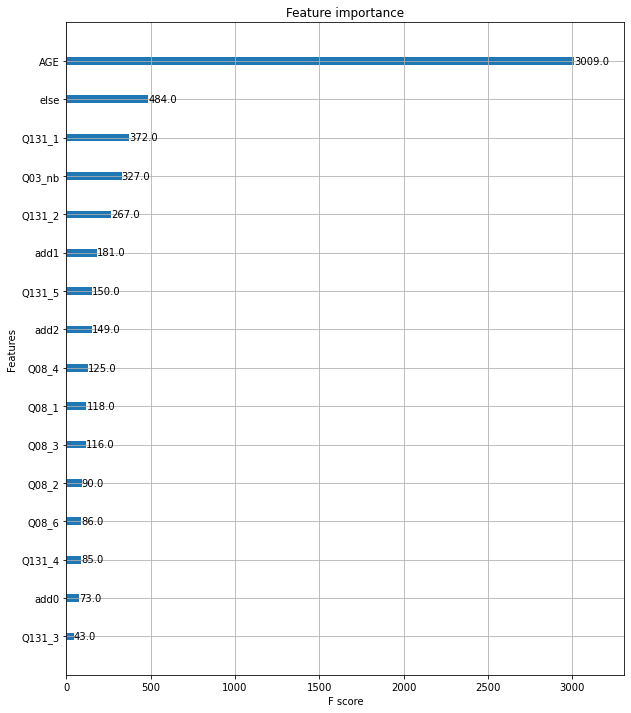

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)

# Gradient Boosting-gridSearchCV

In [45]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.8663
GBM 수행 시간: 0.6초


In [51]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {"max_depth" : range(3,5),
             "learning_rate" : np.linspace(0.1,1,10),
             "n_estimators" :range(5,50,10),
             "max_features":range(1,4)
              }
#Gradient객체 생성후 GridSearchCV수행
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train.values)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 300 candidates, totalling 600 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.30000000000000004, 'max_depth': 3, 'max_features': 3, 'n_estimators': 35}
최고 예측 정확도: 0.8613


In [54]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_clf1=GradientBoostingClassifier(learning_rate= 0.30000000000000004,
                                   max_depth= 3,
                                   n_estimators= 35,
                                   max_features=3,
                                   random_state=0)
gb_clf1.fit(X_train, y_train.values)
gb_pred = gb_clf1.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.8647


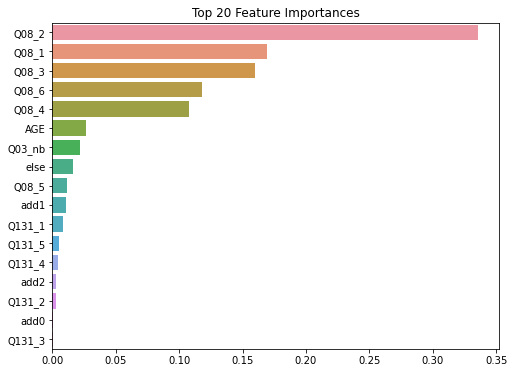

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()